Create 100 nodes 10 years data with 5 different patterns (all unique or with duplicated data)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# delete all old files
import os
dir_name = '.'
testfiles = os.listdir(dir_name)
for item in testfiles:
    if item.startswith("data_"):
        os.remove(os.path.join(dir_name, item))
# define global variables
days = 3650
# number of nodes
n = 1000 
scale = [1,30,100, 500, 1000]

a=1: (1001, 3649)
a=30: (1001, 3649)
a=100: (1001, 3649)
a=500: (1001, 3649)
a=1000: (1001, 3649)


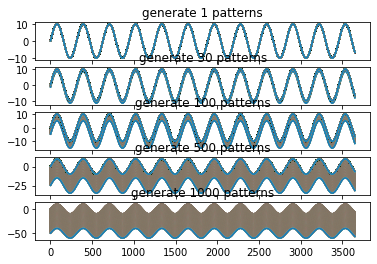

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
# generate 10 years worth of days
x = np.arange(1, days, 1)
y= 10*np.sin(x/50)

#create a nodes with different pattern
# and n-a nodes with same pattern
fig, ax = plt.subplots(len(scale))
for a in scale:
    p = [y]
    for i in range(1,a+1,1):
        z = y-i*0.05
        p.append(z)
    
    # remaining n-a node
    for i in range(1, n-a+1, 1):
        p.append(y)
    data = np.array(p)    
    print(f'a={a}: {data.shape}') 
    ax[scale.index(a)].plot(x,data.T)
    ax[scale.index(a)].set_title(f'generate {a} patterns' )

    #create pandas data frame with node_id step temperature column
    nodeids = np.array([np.repeat(i, data.shape[1]) for i in range(0, data.shape[0],1)]).flatten()
    steps = np.array([list(np.arange(0, data.shape[1], 1))*data.shape[0]]).flatten()
    df_raw_data = pd.DataFrame({'node_id': nodeids,'step': steps})
    df_raw_data['values'] = data.flatten().tolist()
    df_raw_data.to_csv(f'data_{a}.csv', index=False)

    #verify data plot (do not use for large dataset)
#     pd.pivot_table(df_raw_data.reset_index(),
#                index='step', columns='node_id', values='values'
#               ).plot(subplots=False, legend=False)
plt.show() 

C:\virtualenv\malaria\lib\site-packages\pandas\core\frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


Load data_1.csv in 13.9462 seconds
Create binary for data_1.csv in 0.0085 seconds
Load data_1.bin in 0.0166 seconds
Save data_1_new.csv in 14.2709 seconds
Load data_30.csv in 13.5562 seconds
Create binary for data_30.csv in 0.0197 seconds
Load data_30.bin in 0.0227 seconds
Save data_30_new.csv in 14.3159 seconds
Load data_100.csv in 13.6533 seconds
Create binary for data_100.csv in 0.0162 seconds
Load data_100.bin in 0.0286 seconds
Save data_100_new.csv in 14.2120 seconds
Load data_500.csv in 13.8307 seconds
Create binary for data_500.csv in 0.0130 seconds
Load data_500.bin in 0.0416 seconds
Save data_500_new.csv in 14.1966 seconds
Load data_1000.csv in 14.0518 seconds
Create binary for data_1000.csv in 0.0383 seconds
Load data_1000.bin in 0.0569 seconds
Save data_1000_new.csv in 14.3076 seconds


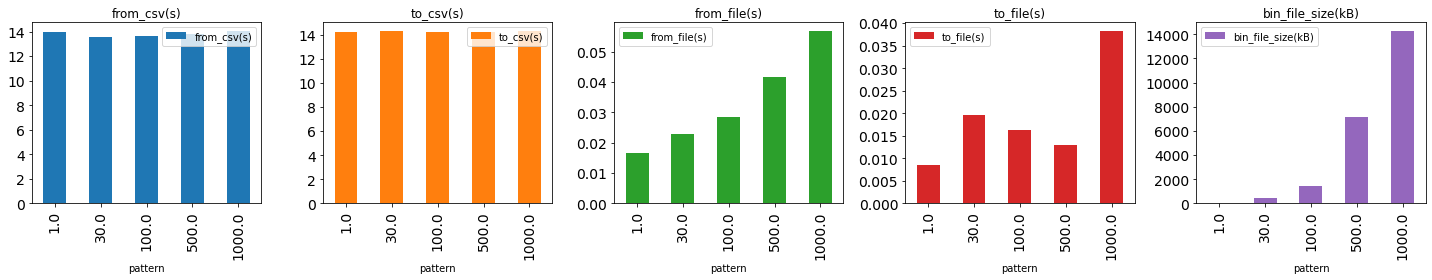

In [4]:
import time
import os
from emodpy_malaria.weather import *
df = pd.DataFrame({'pattern':  pd.Series(dtype='int'),
                   'from_csv(s)':  pd.Series(dtype='float'),
                   'to_csv(s)':  pd.Series(dtype='float'),
                   'from_file(s)':  pd.Series(dtype='float'),
                   'to_file(s)':  pd.Series(dtype='float'),
                   'bin_file_size(kB)':  pd.Series(dtype='float'),
                  })
                  
for a in scale:
    tic = time.perf_counter()
    wd = WeatherData.from_csv(f'data_{a}.csv')
    toc = time.perf_counter()
    load_time_csv = toc - tic
    print(f"Load data_{a}.csv in {load_time_csv:0.4f} seconds")
    
    tic = time.perf_counter()
    wd.to_file(f'data_{a}.bin')
    wd.metadata.to_file(f'data_{a}.bin.json')
    toc = time.perf_counter()
    save_time_bin = toc - tic
    print(f"Create binary for data_{a}.csv in {save_time_bin:0.4f} seconds")
    file_size = os.path.getsize(f'data_{a}.bin')
    
    tic = time.perf_counter()
    wd = WeatherData.from_file(f'data_{a}.bin')
    toc = time.perf_counter()
    load_time_bin = toc -tic
    print(f"Load data_{a}.bin in {load_time_bin:0.4f} seconds")
    
    tic = time.perf_counter()
    wd.to_csv(f'data_{a}_new.csv')
    toc = time.perf_counter()
    save_time_csv = toc -tic
    print(f"Save data_{a}_new.csv in {save_time_csv:0.4f} seconds")
    
    row = [int(a), load_time_csv, save_time_csv, load_time_bin, save_time_bin, file_size/1024]
    df.loc[len(df)] = row
 
df = df.set_index('pattern')
df.plot.bar(subplots=True, use_index=True, layout=(1,5), figsize=(20,4), fontsize=14)
plt.tight_layout() 
  

In [5]:
df

,from_csv(s),to_csv(s),from_file(s),to_file(s),bin_file_size(kB)
pattern,,,,,
1.0,13.946167,14.270884,0.016578,0.008522,28.507812
30.0,13.556158,14.315938,0.022746,0.019701,441.871094
100.0,13.653309,14.211977,0.028553,0.016195,1439.644531
500.0,13.830728,14.196648,0.041563,0.012960,7141.207031
1000.0,14.051769,14.307555,0.056867,0.038252,14268.160156


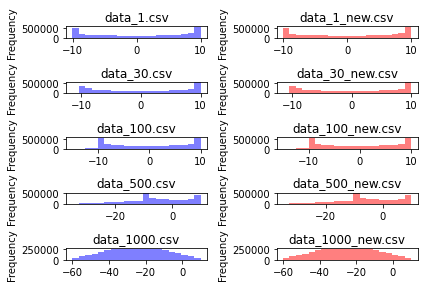

In [6]:
plt.figure()
for a in scale:
    f = f'data_{a}.csv'
    f_new = f'data_{a}_new.csv'
    df = pd.read_csv(f)
    plt.subplot(len(scale),2, (scale.index(a) *2 +1))
    ax = df['values'].plot.hist(bins=20, title=f, color='b', alpha=0.5)    
    df_new = pd.read_csv(f_new)
    plt.subplot(len(scale),2, (scale.index(a) *2 +2))
    df_new['values'].plot.hist(bins=20, title=f_new, color='r', alpha=0.5) 
plt.tight_layout()    